In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

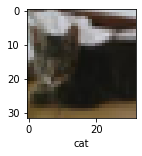

In [10]:
plot_sample(X_train, y_train, 9)

**Normalizing the training data**

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Build simple artificial neural network for image classification**

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 130s 82ms/step - loss: 1.8091 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 124s 80ms/step - loss: 1.6207 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.5390 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4819 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4316 - accuracy: 0.4992


In [13]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.62      0.56      1000
           1       0.57      0.63      0.60      1000
           2       0.40      0.30      0.35      1000
           3       0.30      0.30      0.30      1000
           4       0.62      0.21      0.32      1000
           5       0.34      0.49      0.40      1000
           6       0.57      0.46      0.51      1000
           7       0.52      0.53      0.52      1000
           8       0.71      0.47      0.56      1000
           9       0.42      0.69      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



**build a convolutional neural network to train our images**

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4372 - accuracy: 0.4860
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0777 - accuracy: 0.6233
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9535 - accuracy: 0.6675
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8749 - accuracy: 0.6960
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8035 - accuracy: 0.7214
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7475 - accuracy: 0.7395
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.6922 - accuracy: 0.7578
Epoch 8/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.6444 - accuracy: 0.7761
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6044 - accuracy: 0.7888
Epoch 10/10
1563/1563 [==============================] - 67s 43m

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9575 - accuracy: 0.6921


[0.957533597946167, 0.6920999884605408]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.95513324e-04, 5.60388526e-06, 6.48259593e-05, 9.23518062e-01,
        1.08162909e-04, 7.28228837e-02, 1.99051830e-03, 4.70255363e-05,
        8.46862618e-04, 6.33367108e-07],
       [4.32363449e-05, 1.62651334e-02, 2.00383017e-08, 3.63222938e-07,
        1.74999570e-09, 1.03069431e-09, 3.03388892e-09, 3.10005598e-11,
        9.83586073e-01, 1.05177154e-04],
       [3.86047438e-02, 8.23431253e-01, 6.16139779e-03, 5.26066981e-02,
        5.33940503e-03, 1.74308324e-03, 2.57520122e-03, 6.58279005e-03,
        4.57935482e-02, 1.71618946e-02],
       [3.21873486e-01, 1.20436391e-02, 6.12292951e-03, 3.09937857e-02,
        1.37103768e-02, 1.87293204e-04, 4.24588536e-04, 2.54140887e-05,
        6.14452064e-01, 1.66332960e-04],
       [3.39165035e-06, 1.95937770e-04, 3.92195396e-02, 2.80090589e-02,
        3.23790729e-01, 2.21571070e-03, 6.06546581e-01, 1.32952082e-05,
        1.03032096e-06, 4.69616680e-06]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 1, 8, 6, 6, 1, 6, 3, 9]

In [20]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)